# **SVM - Kernel comparison**

## Kernel interpretation

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

from PIL import Image
from sklearn import svm
from sklearn.datasets import make_gaussian_quantiles

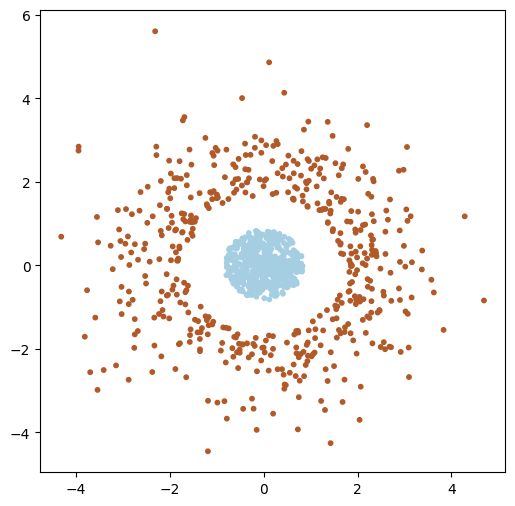

In [2]:
X, y = make_gaussian_quantiles(cov=2,
                                 n_samples=1000, n_features=2,
                                 n_classes=2, random_state=1)

X[y==0] = X[y==0] * 0.5

_, ax  = plt.subplots(figsize=(6,6))
ax.scatter( X[:,0] , X[:,1] , c=y , s=10, cmap="Paired")

In [31]:
a = 3
print ("----- Results for {0} -----".format( a ).center(50, '-'))

----------------- Results for 3 ------------------


In [3]:
Xk = X[:, 0]**2 + X[:, 1]**2
X = np.concatenate ([X, Xk.reshape(-1,1)], axis=1)
print(X.shape)

(1000, 3)


In [ ]:
def create_3d_fig(X, y, grid_res=100, view = (90,0)):
    # f, _  = plt.subplots(figsize=(6,6))
    f = plt.figure(figsize=(6,6))
    ax = f.add_subplot(projection="3d")
    ax.view_init(view[0], view[1])
    ax.scatter3D( X[:, 0] , X[:, 1] , X[:, 2] , c = y , s=10, cmap="Paired")
    h_grid, v_grid = np.meshgrid(np.linspace(X[:, 1].min(),X[:, 1].max(),grid_res), np.linspace(X[:, 1].min(),X[:, 1].max(),grid_res))
    k_grid = np.ones(h_grid.shape)*1.5
    ax.plot_surface( h_grid, v_grid, k_grid, alpha=0.5)
    ax.set_zlim(0,5)
    ax.set_xlabel("h")
    ax.set_ylabel("v")

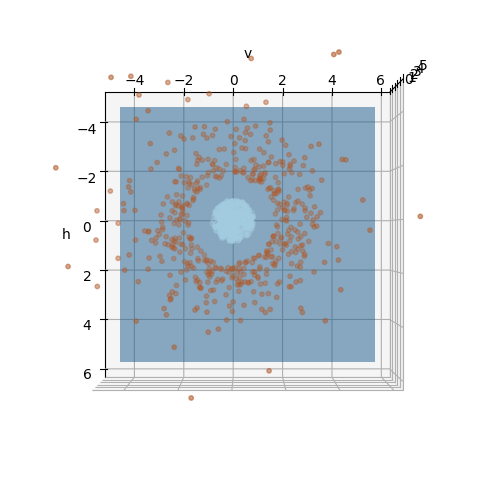

In [ ]:
create_3d_fig(X, y, grid_res=100, view=(90,0))
# plt.show()

In [ ]:
# Sve all figs
import os
# Save all figs

os.makedirs("imgs/", exist_ok=True)

for v in range (0,91,5):
     create_3d_fig(X, y, grid_res=100, view=(v,3))
     plt.tight_layout()
     plt.savefig("imgs/{0}.png".format(v), dpi=50)
     plt.close(); plt.clf()


<Figure size 640x480 with 0 Axes>

In [28]:
import os
from natsort import natsorted, ns
from PIL import Image

list_images = []
p = "imgs/"

# Save a gif
for file_ in natsorted(os.listdir(p), alg=ns.PATH, reverse=True):
    image = Image.open(p + file_)
    list_images.append(image)

image.save("imgs/kernel_ill2.gif", save_all=True, append_images=list_images, duration=200, loop=0)

## SVM

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

In [ ]:
# we create 100 separable points
X, Y = make_classification(n_samples = _ , n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=2, random_state=2)
plt.scatter( _ , _ , c = _ , s = _, cmap=plt.cm.Paired)

In [ ]:

kernels = ['linear', 'poly', 'rbf']

_, axes = plt.subplots(1,3, figsize = (20,5))

# fit the model
for _ :
    #
    clf = svm.SVC(kernel = _ , gamma = 1)
    clf.fit( _ , _ )

    x_min, x_max = _ , _ 
    y_min, y_max = _ , _ 

    x_dim, y_dim = np.meshgrid(np.arange( _ , _ , 0.01), np.arange( _ , _ , 0.01))
    predictions = clf.predict(np.c_[x_dim.ravel(), y_dim.ravel()])

    predictions = predictions.reshape( _ )
    axes[i].pcolormesh( _ , _ , predictions, cmap = plt.cm.Paired) 
    axes[i].contour( _ , _ , predictions, colors=['k', 'k'], linestyles=['-', '-'], levels=[0, 1])
    
    axes[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 90, facecolors = 'none', edgecolors = 'k')
                
    axes[i].scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
    axes[i].set_axis_off()
    
plt.show()

In [ ]:

kernels = ['linear', 'poly', 'rbf']

_, axes = plt.subplots(1,3, figsize = (20,5))

# fit the model
for i, kernel in enumerate(kernels):
    #
    clf = svm.SVC(kernel = _ , gamma = 1)
    clf.fit( _ , _ )

    x_min, x_max = _ , _ 
    y_min, y_max = _ , _ 

    x_dim, y_dim = np.meshgrid(np.arange( _ , _ , 0.01), np.arange( _ , _ , 0.01))
    predictions = clf.decision_function(np.c_[x_dim.ravel(), y_dim.ravel()])

    predictions = predictions.reshape(x_dim.shape)
    axes[i].pcolormesh( _ , _ , predictions, cmap = plt.cm.coolwarm) 
    axes[i].contourf( _ , _ , predictions, alpha = 0.75, cmap = plt.cm.coolwarm)
    
    axes[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 90, facecolors = 'none', edgecolors = 'k')
                
    axes[i].scatter( _ , _ , c=Y, cmap=plt.cm.coolwarm, edgecolors='k')
    axes[i].set_axis_off()
    
plt.show()

Crear una función para graficar las fronteras de decisión de las SVM con las dos opciones mostradas anteriormente.

## In real data

Continúe evaluando los kernels anteriores en la base de datos Iris y fruits.